In [1]:
import numpy as np
from scipy import optimize
import matplotlib.pyplot as plt
from shapely.geometry  import Point, LineString, MultiLineString

In [2]:
ABEL_NOBLE_COEF = 0.00769              # [m3.kg-1]
H2_GAMMA        = 1.4                  # [-]
R_GAS           = 8.31446261815324     # [J.K-1.mol-1]
M_H2            = 0.002016             # [kg.mol-1]
R_H2            = R_GAS / M_H2         # [J.K-1.kg-1]
Cp_H2           = 14310                # [J.kg-1.K-1] 

K               = 0.5

D               = 0.00075              # [m]
L               = 0.015                # [m]

f               = 0.049
F               = f*L/D

T1              = 300                  # [K]
P1              = 400e5                # [Pa]

In [3]:
TANK_TEMP = T1
TANK_PRES = P1

https://stackoverflow.com/questions/78585523/python-solving-non-linear-system-of-equations-issue-with-sqrt

In [4]:
def equations10(p):
    u3, T3 = p;
    return np.array([
        (u3 / ABEL_NOBLE_COEF) * (1 - ((np.sqrt(H2_GAMMA * R_H2 * T3)) / u3)) * (np.sqrt((R_H2 * T3) / H2_GAMMA)  + ((K + F) / 4) * np.sqrt((2 / K) * (Cp_H2 * TANK_TEMP - Cp_H2 * T3 - ((u3**2) / 2) * ((F / 4) + 1) )) + u3 * ((F / 4) + 1)) - TANK_PRES,
        (u3 / ABEL_NOBLE_COEF) * (1 - ((np.sqrt(H2_GAMMA * R_H2 * T3)) / u3)) * (((R_H2 * (TANK_TEMP - (TANK_TEMP - T3 - ((u3**2) / (2 * Cp_H2)) * ((F / 4) + 1)) * ((K + 1) / K))) / (np.sqrt((2 / K) * (Cp_H2 * TANK_TEMP - Cp_H2 * T3 - (u3**2 / 2) * ((F / 4) + 1))) - u3 + np.sqrt(H2_GAMMA * R_H2 * T3))) + ((K / 4) + 1) * np.sqrt((2 / K) * (Cp_H2 * TANK_TEMP - Cp_H2 * T3 - (u3**2 / 2) * ((F / 4) + 1)))) - TANK_PRES
    ])

In [5]:
u = np.linspace(0, 1500, 200)   # Velocity [m.s-1]
t = np.linspace(0, 500, 200)    # Temperature [K]
#u = np.linspace(1200, 1400, 500)   # Velocity [m.s-1]
#t = np.linspace(200, 260, 500)    # Temperature [K]
#u = np.linspace(1300, 1325, 500)   # Velocity [m.s-1]
#t = np.linspace(230, 240, 500)    # Temperature [K]
U, T = np.meshgrid(u, t)
X, Y = equations10([U, T])

/tmp/ipykernel_4649/3210126654.py:4: RuntimeWarning: divide by zero encountered in divide
  (u3 / ABEL_NOBLE_COEF) * (1 - ((np.sqrt(H2_GAMMA * R_H2 * T3)) / u3)) * (np.sqrt((R_H2 * T3) / H2_GAMMA)  + ((K + F) / 4) * np.sqrt((2 / K) * (Cp_H2 * TANK_TEMP - Cp_H2 * T3 - ((u3**2) / 2) * ((F / 4) + 1) )) + u3 * ((F / 4) + 1)) - TANK_PRES,
/tmp/ipykernel_4649/3210126654.py:4: RuntimeWarning: invalid value encountered in divide
  (u3 / ABEL_NOBLE_COEF) * (1 - ((np.sqrt(H2_GAMMA * R_H2 * T3)) / u3)) * (np.sqrt((R_H2 * T3) / H2_GAMMA)  + ((K + F) / 4) * np.sqrt((2 / K) * (Cp_H2 * TANK_TEMP - Cp_H2 * T3 - ((u3**2) / 2) * ((F / 4) + 1) )) + u3 * ((F / 4) + 1)) - TANK_PRES,
/tmp/ipykernel_4649/3210126654.py:4: RuntimeWarning: invalid value encountered in multiply
  (u3 / ABEL_NOBLE_COEF) * (1 - ((np.sqrt(H2_GAMMA * R_H2 * T3)) / u3)) * (np.sqrt((R_H2 * T3) / H2_GAMMA)  + ((K + F) / 4) * np.sqrt((2 / K) * (Cp_H2 * TANK_TEMP - Cp_H2 * T3 - ((u3**2) / 2) * ((F / 4) + 1) )) + u3 * ((F / 4) + 1)) - TAN

In [6]:
U, T = np.meshgrid(u, t)

In [7]:
X, Y = equations10([U, T])

/tmp/ipykernel_4649/3210126654.py:4: RuntimeWarning: divide by zero encountered in divide
  (u3 / ABEL_NOBLE_COEF) * (1 - ((np.sqrt(H2_GAMMA * R_H2 * T3)) / u3)) * (np.sqrt((R_H2 * T3) / H2_GAMMA)  + ((K + F) / 4) * np.sqrt((2 / K) * (Cp_H2 * TANK_TEMP - Cp_H2 * T3 - ((u3**2) / 2) * ((F / 4) + 1) )) + u3 * ((F / 4) + 1)) - TANK_PRES,
/tmp/ipykernel_4649/3210126654.py:4: RuntimeWarning: invalid value encountered in divide
  (u3 / ABEL_NOBLE_COEF) * (1 - ((np.sqrt(H2_GAMMA * R_H2 * T3)) / u3)) * (np.sqrt((R_H2 * T3) / H2_GAMMA)  + ((K + F) / 4) * np.sqrt((2 / K) * (Cp_H2 * TANK_TEMP - Cp_H2 * T3 - ((u3**2) / 2) * ((F / 4) + 1) )) + u3 * ((F / 4) + 1)) - TANK_PRES,
/tmp/ipykernel_4649/3210126654.py:4: RuntimeWarning: invalid value encountered in multiply
  (u3 / ABEL_NOBLE_COEF) * (1 - ((np.sqrt(H2_GAMMA * R_H2 * T3)) / u3)) * (np.sqrt((R_H2 * T3) / H2_GAMMA)  + ((K + F) / 4) * np.sqrt((2 / K) * (Cp_H2 * TANK_TEMP - Cp_H2 * T3 - ((u3**2) / 2) * ((F / 4) + 1) )) + u3 * ((F / 4) + 1)) - TAN

In [8]:
levels = np.linspace(-3e6, 3e6, 21)
levels

array([-3000000., -2700000., -2400000., -2100000., -1800000., -1500000.,
       -1200000.,  -900000.,  -600000.,  -300000.,        0.,   300000.,
         600000.,   900000.,  1200000.,  1500000.,  1800000.,  2100000.,
        2400000.,  2700000.,  3000000.])

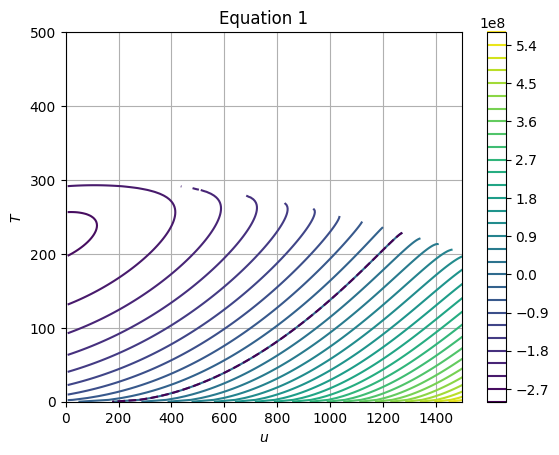

In [9]:
fig, axe = plt.subplots()
caxe = axe.contour(U, T, X, 30)
axe.contour(U, T, X, [0], linestyles="--")
cbar = fig.colorbar(caxe)
axe.set_title('Equation 1')
axe.set_xlabel("$u$")
axe.set_ylabel("$T$")
axe.grid()

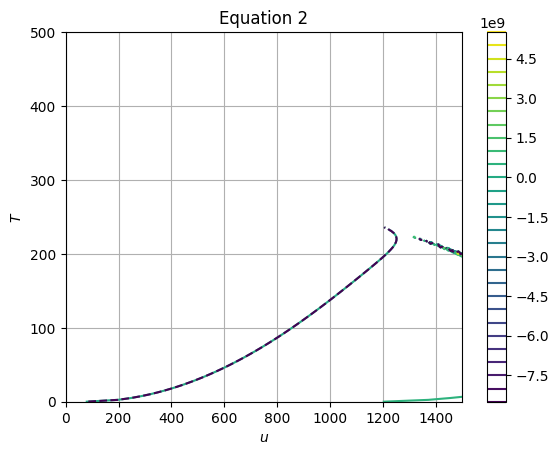

In [10]:
fig, axe = plt.subplots()
caxe = axe.contour(U, T, Y, 30)
axe.contour(U, T, Y, [0], linestyles="--")
cbar = fig.colorbar(caxe)
axe.set_title('Equation 2')
axe.set_xlabel("$u$")
axe.set_ylabel("$T$")
axe.grid()

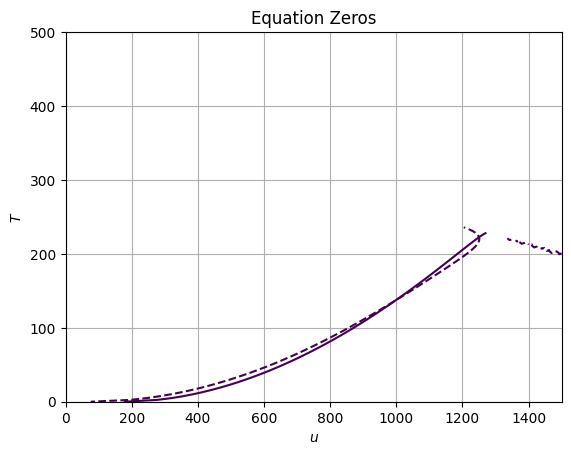

In [11]:
fig, axe = plt.subplots()
c1 = axe.contour(U, T, X, [0], linestyles="-")
c2 = axe.contour(U, T, Y, [0], linestyles="--")
axe.set_title('Equation Zeros')
axe.set_xlabel("$u$")
axe.set_ylabel("$T$")
axe.grid()

In [12]:
def get_curve(contour):
    curve = MultiLineString([
        LineString(path.vertices) for path in contour.collections[0].get_paths()
    ])
    return curve

In [13]:
C1 = get_curve(c1)
C2 = get_curve(c2)

In [14]:
sol = C1.intersection(C2)

In [15]:
sol.geoms[1].coords[:]

[(998.0861404156503, 137.18929051999916)]

In [16]:
sol1 = optimize.fsolve(equations10, x0=[1275, 220])
sol1

array([1250.20118685,  222.56397776])

In [17]:
sol2 = optimize.fsolve(equations10, x0=[1000, 125])
sol2

array([998.07723356, 137.18343632])

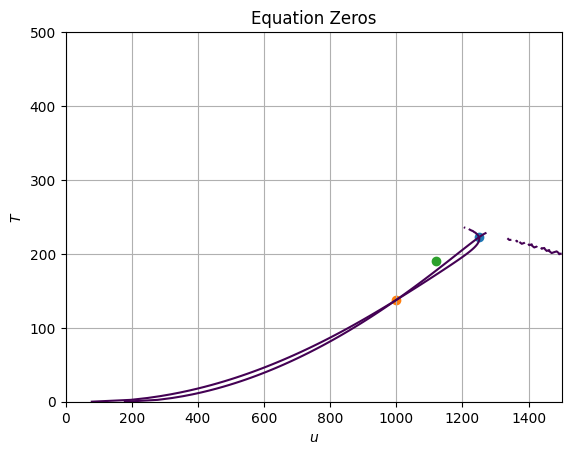

In [22]:
fig, axe = plt.subplots()
axe.contour(U, T, X, [0], linestyles="-")
axe.contour(U, T, Y, [0], linestyles="-")
axe.scatter(*sol1)
axe.scatter(*sol2)
axe.scatter(1118.7720333444042, 190.58724513089416)
axe.set_title('Equation Zeros')
axe.set_xlabel("$u$")
axe.set_ylabel("$T$")
axe.grid()

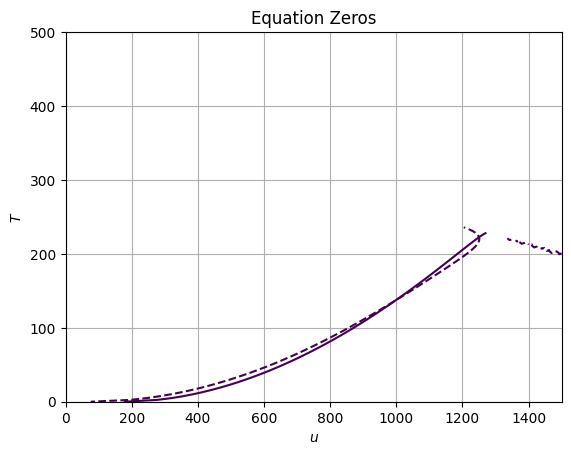

In [19]:
fig, axe = plt.subplots()
axe.contour(U, T, X, [0], linestyles="-")
axe.contour(U, T, Y, [0], linestyles="--")
axe.set_title('Equation Zeros')
axe.set_xlabel("$u$")
axe.set_ylabel("$T$")
axe.grid()

In [20]:
equations10([1e-8, 1e-8])

array([-40001515.03489727, -40004016.45356692])

In [21]:
import numpy as np
from scipy.optimize import fsolve

""" VARIABLES """
ABEL_NOBLE_COEF = 0.00769              # [m3.kg-1]
H2_GAMMA        = 1.4                  # [-]
R_GAS           = 8.31446261815324     # [J.K-1.mol-1]
M_H2            = 0.002016             # [kg.mol-1]
R_H2            = R_GAS / M_H2         # [J.K-1.kg-1]
Cp_H2           = 14310                # [J.kg-1.K-1] 

Diam3           = 0.00075              # [m]
Length          = 0.015                # [m]
f               = 0.037
F               = f*Length/Diam3
K               = 0.5

T1              = 287.65               # [K]
P1              = 400e5                # [Pa]
Rho1            = 1                    # [kg.m-3]
u1              = 0                    # [m.s-1]

# T2              = 1
# P2              = 1
# Rho2            = 1
# u2              = 1

T3              = 1
P3              = 1
Rho3            = 1
u3              = 1

T4              = 1
P4              = 101325
Rho4            = 1
u4              = 1
A4              = 1                   # [m2]


""""" WITHOUT LOSSES """""
""" STATE 1 """
rho1 = P1 / (ABEL_NOBLE_COEF * P1 + R_H2 * T1)


""" rho3 """
def equation1(p):

    rho3 = p

    return ( ((rho3 / (1 - ABEL_NOBLE_COEF * rho3))**(H2_GAMMA - 1)) * (1 + ((H2_GAMMA - 1) / (2 * ((1 - ABEL_NOBLE_COEF * rho3)**2)))) - ((rho1 / (1 - ABEL_NOBLE_COEF * rho1))**(H2_GAMMA - 1)) )


rho3 =  fsolve(equation1, 10)[0]


""" T3 """
def equation2(p):

    T3 = p

    return ( 1 + ((H2_GAMMA - 1) / (2 * ((1 - ABEL_NOBLE_COEF * rho3)**2))) - (T1 / T3) )


T3 = fsolve(equation2, 300)[0]


""" P3 """
def equation3(p):
    
    P3 = p
    
    return ( (P3 / (ABEL_NOBLE_COEF * P3 + R_H2 * T3)) - rho3 )

P3 = fsolve(equation3, 101325)[0]


""" u3 """
u3 = np.sqrt((H2_GAMMA * P3) / (rho3 * (1 - ABEL_NOBLE_COEF * rho3)))


""" T4 """
T4 = ((2 * T3) / (H2_GAMMA + 1)) + ((H2_GAMMA - 1) / (H2_GAMMA + 1)) * (P3 / (rho3 * (1 - ABEL_NOBLE_COEF * rho3) * R_H2))


""" u4 """
u4 = np.sqrt(H2_GAMMA * R_H2 * T4)


""" rho4 """
rho4 = (P4 / (R_H2 * T4))


""" Diam4 / A4 """
Diam4 = Diam3 * np.sqrt((rho3 * u3) / (rho4 * u4))

A4 = np.pi * (Diam4 / 2)**2


Q = rho4 * u4 * A4 * 1000
print("Q NoLosses = " + str(Q))



""""" WITH LOSSES """""
""" REYNOLDS """
H2_Visc_3 = 7.3e-06
#H2_Visc_3 = 8.3969e-05

Re3 = (rho3 * u3 * Diam3) / H2_Visc_3

""" Friction factor - f """
def equation4(p):
    
    f = p
    
    return ( (1 / np.sqrt(f)) - 0.869 * np.log(Re3 * np.sqrt(f)) + 0.8 )

f = fsolve(equation4, 0.01)[0]
F = f*Length/Diam3

print("F coef = " + str(f))


""" EQUATIONS """
def equation5(p):

    P2, T2, u2, rho2, P3, T3, u3, rho3, T4, u4, rho4, A4 = p;

    return (P2 - P1 + rho2 * (u2**2) * ((K / 4) + 1),
            Cp_H2 * T1 - Cp_H2 * T2 - ((K + 1) * (u2**2) / 2),
            P2 - ((rho2 * R_H2 * T2) / (1 - ABEL_NOBLE_COEF * rho2)),
            P3 - P2 + rho2 * (u2**2) * ((F / 4) - 1) + rho3 * (u3**2) * ((F / 4) + 1),
            Cp_H2 * T2 + ((u2**2) / 2) - Cp_H2 * T3 - ((F / 4) + 1) * ((u3**2) / 2),
            rho3 - (P3 / (ABEL_NOBLE_COEF * P3 + R_H2 * T3)),
            rho2 * u2 - rho3 * u3,
            u3 - np.sqrt((H2_GAMMA * R_H2 * (T3)) / (1 - ABEL_NOBLE_COEF * rho3)),
            u4 - np.sqrt((H2_GAMMA * R_H2 * (T4))),
            rho4 - (101325 / (R_H2 * T4)),
            Cp_H2 * T3 + ((u3**2)/2) - Cp_H2 * T4 - ((u4**2) / 2),
            rho3 * u3 * np.pi * ((Diam3 / 2)**2) - rho4 * u4 * A4)


P2, T2, u2, rho2, P3, T3, u3, rho3, T4, u4, rho4, A4 =  fsolve(equation5, (1e7, 200, 1100, 0.1, 1e7, 200, 1100, 0.1, 200, 1100, 0.1, 1e-04))
print(P2, T2, u2, rho2, P3, T3, u3, rho3, T4, u4, rho4, A4)
print("*****")
Q = rho4 * u4 * A4 * 1000
print("Q WithLosses = " + str(Q))
print(u3, T3)

Q NoLosses = 9.547738170238704
F coef = 0.010190456813709338
6182754.489455214 134.34699041355074 1710.2694006820827 10.276770471394075 14045420.575391496 190.58724513089416 1118.7720333444042 15.710122841127397 194.9837472892288 1061.0480530221216 0.12600115975287182 5.8079650628356486e-05
*****
Q WithLosses = 7.764859297766165
1118.7720333444042 190.58724513089416
